In [15]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

# LOADING DATASET

In [16]:
df=pd.read_csv('dataset.csv')

/home/shim/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df=df.drop('0',axis=1)
df

,ka,255,255.1,255.2,254,241,206,158,176,221,...,220.2,255.305,255.306,255.307,255.308,255.309,255.310,255.311,255.312,255.313
0,ka,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,254,250,255
1,ka,255,255,255,255,255,252,124,1,0,...,255,255,255,255,255,255,255,252,153,172
2,ka,235,204,168,128,93,87,82,71,80,...,255,255,212,30,7,112,220,253,255,255
3,ka,255,255,255,255,255,255,255,255,255,...,255,255,255,149,191,255,255,255,255,255
4,ka,255,243,189,158,163,164,161,161,164,...,89,0,76,248,255,255,255,255,255,255
5,ka,255,254,249,251,253,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,ka,255,255,255,254,242,199,112,66,65,...,255,255,255,255,220,45,52,217,254,255
7,ka,255,255,255,255,255,255,255,255,255,...,0,0,21,6,97,219,254,255,255,255
8,ka,255,255,255,255,255,255,251,203,176,...,244,61,3,172,254,255,255,255,255,255
9,ka,255,255,255,255,255,255,255,255,255,...,239,255,255,255,255,255,255,255,255,255


In [20]:
for i in range(Labels.size):
    if(type(Labels[i]) is int):
        Labels[i]=str(Labels[i])
Labels

array(['ka', 'ka', 'ka', ..., '9', '9', '9'], dtype=object)

In [21]:
Labels=df['ka'].values
unique_val = np.array(Labels)
np.unique(unique_val)
df=df.drop('ka',axis=1)

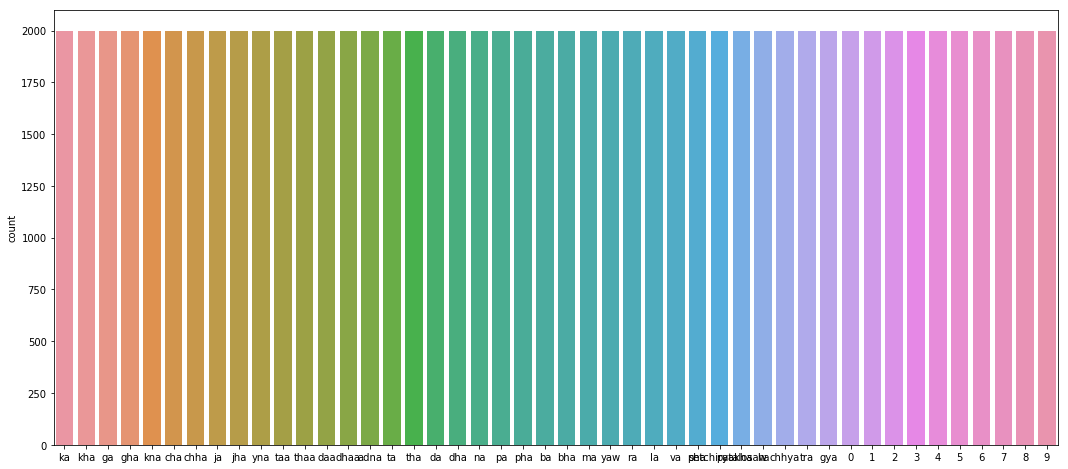

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(x=Labels)

In [23]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(Labels)

In [25]:
images = df.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [26]:
images.shape
labels.shape

(91999, 46)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size = 0.15, random_state = 101)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [29]:
batch_size = 128
num_classes = 46
epochs = 20

In [30]:
x_train = x_train / 255
x_test = x_test / 255

In [32]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [33]:
model = Sequential()
model.add(Conv2D(64,strides=(1,1),kernel_size=(5,5),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 78199 samples, validate on 13800 samples
Epoch 1/20
78199/78199 [==============================] - 126s 2ms/step - loss: 1.0469 - acc: 0.7086 - val_loss: 0.2999 - val_acc: 0.9170
Epoch 2/20
78199/78199 [==============================] - 122s 2ms/step - loss: 0.3139 - acc: 0.9051 - val_loss: 0.1783 - val_acc: 0.9456
Epoch 3/20
78199/78199 [==============================] - 123s 2ms/step - loss: 0.2123 - acc: 0.9343 - val_loss: 0.1545 - val_acc: 0.9557
Epoch 4/20
78199/78199 [==============================] - 128s 2ms/step - loss: 0.1662 - acc: 0.9481 - val_loss: 0.1316 - val_acc: 0.9628
Epoch 5/20
78199/78199 [==============================] - 141s 2ms/step - loss: 0.1345 - acc: 0.9576 - val_loss: 0.1121 - val_acc: 0.9677
Epoch 6/20
78199/78199 [==============================] - 145s 2ms/step - loss: 0.1170 - acc: 0.9628 - val_loss: 0.1058 - val_acc: 0.9689
Epoch 7/20
78199/78199 [==============================] - 120s 2ms/step - 

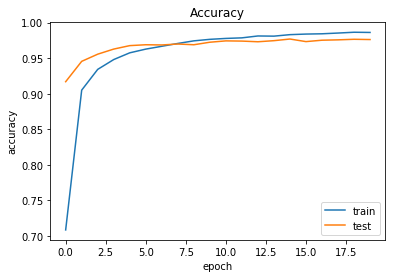

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

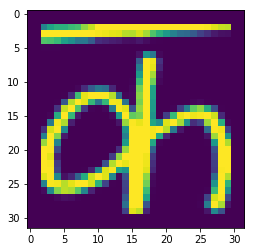

In [81]:
img=cv2.imread('example.png',0)
imgplot=plt.imshow(img)

In [82]:
hindi_letters=['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','taa','thaa','daa','dhaa','adna','ta','tha','da','dha','na','pa','pha','ba','bha','ma','yaw','ra','la','va','sha','petchiryakha','patalosaw','ha','chhya','tra','gya','0','1','2','3','4','5','6','7','8','9']
ans=model.predict(img.reshape(1,32,32,1))
print(hindi_letters[np.argmax(ans)])

yaw
